<a href="https://colab.research.google.com/github/FeliciaHester/All-Life-Bank-Project/blob/main/1_21_25_Copy_of_All_Life_Bank_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

In [ ]:
#Install the sklearn_extra library before running the below cell.
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.6 MB/s eta 0:00:00


In [ ]:
# Importing all the necessary packages

import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [ ]:
data = pd.read_excel('Credit Card Customer Data.xlsx')

data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
# Verify the current working directory
import os
print("Current Directory:", os.getcwd())

# List files in the current working directory
print("Files in Directory:", os.listdir('.'))

Current Directory: /content
Files in Directory: ['.config', '.ipynb_checkpoints', 'Credit Card Customer Data.xlsx', 'sample_data']


### **Check the info of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are **660 observations and 7 columns** in the dataset.
- All the columns have 660 non-null values, i.e., there are **no missing values**.
- **All the columns are of integer data type**.

**There are no missing values. Let us now figure out the number of unique values in each column.**

In [ ]:
data.nunique()

,0
Sl_No,660
Customer Key,655
Avg_Credit_Limit,110
Total_Credit_Cards,10
Total_visits_bank,6
Total_visits_online,16
Total_calls_made,11


- Customer key, which is an identifier, has duplicate values. We will treat the duplicate customer keys before applying any algorithm.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking duplicate customer keys**

### **Drop the rows with duplicate customer keys**

In [ ]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data['Customer Key'].duplicated(keep=False)

data[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


- There are **5 duplicate customer keys**. We can **drop these observations**.


In [ ]:
# drop duplicate keys

data = data.drop_duplicates(subset=['Customer Key'], keep='first')

### **Dropping variable columns that are not required for the analysis**


In [ ]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

### **Checking duplicate rows for customers with identical features.**

In [ ]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


- There are 11 duplicate rows. Drop these from the data.

In [ ]:
data = data[~data.duplicated()]

###**Check new data shape**

In [ ]:
data.shape

(644, 5)

- After removing the duplicate keys, the duplicate rows, and dropping unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary Statistics**

In [ ]:
# Calculate descriptive statistics
data.describe()

# Calculate descriptive statistics, transpose, and round to 2 decimal places
rounded_stats = data.describe().apply(lambda row: row.apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x), axis=1)

# Format the first column as currency
rounded_stats.iloc[:, 0] = rounded_stats.iloc[:, 0].apply(lambda x: "${:,.2f}".format(x))


display(rounded_stats)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,$644.00,644.00,644.00,644.00,644.00
mean,"$34,543.48",4.69,2.40,2.62,3.61
std,"$37,428.70",2.18,1.63,2.96,2.88
min,"$3,000.00",1.00,0.00,0.00,0.00
25%,"$11,000.00",3.00,1.00,1.00,1.00
50%,"$18,000.00",5.00,2.00,2.00,3.00
75%,"$48,000.00",6.00,4.00,4.00,5.25
max,"$200,000.00",10.00,5.00,15.00,10.00


**Note: Removed the currency potion of code so my charts would run.**


#### **Check the distribution and outliers for each variable in the data.**

Avg_Credit_Limit
Skew : 2.19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total_Credit_Cards
Skew : 0.17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total_visits_bank
Skew : 0.15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total_visits_online
Skew : 2.21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total_calls_made
Skew : 0.65


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

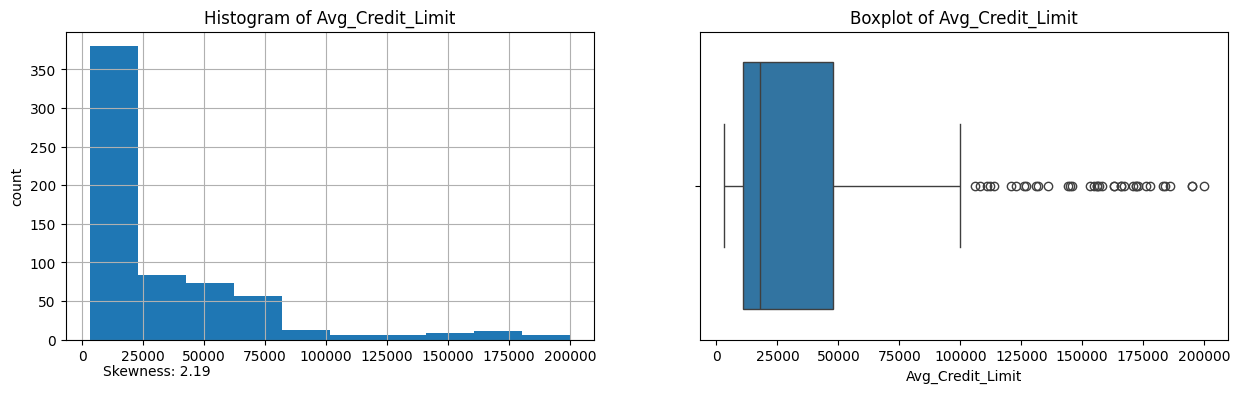

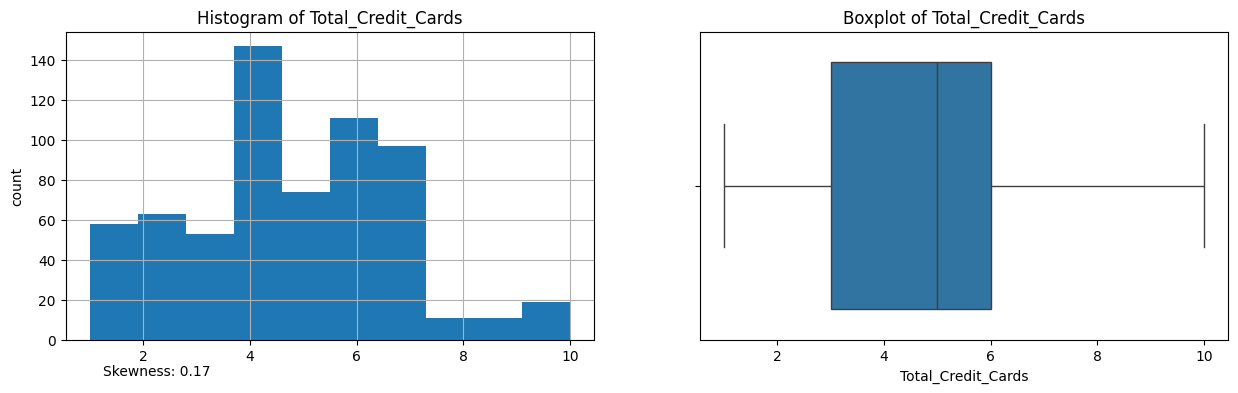

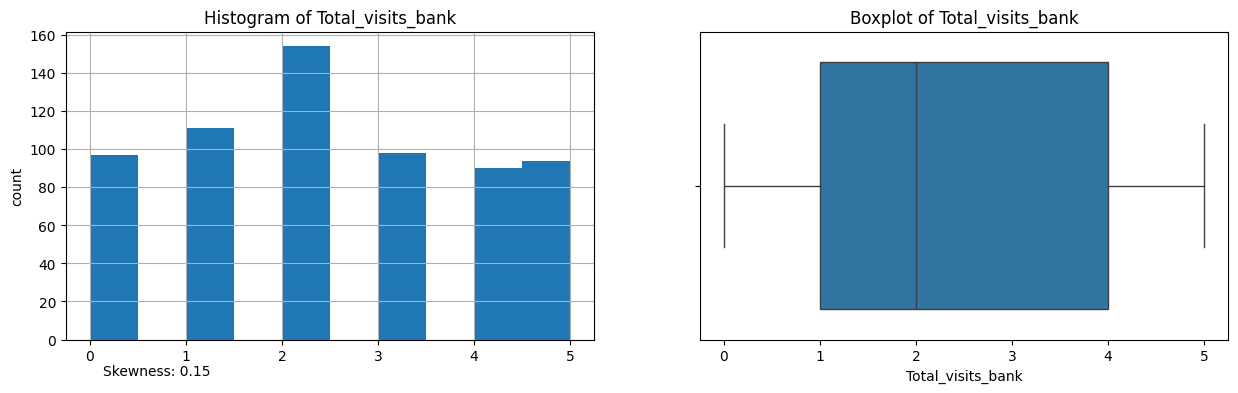

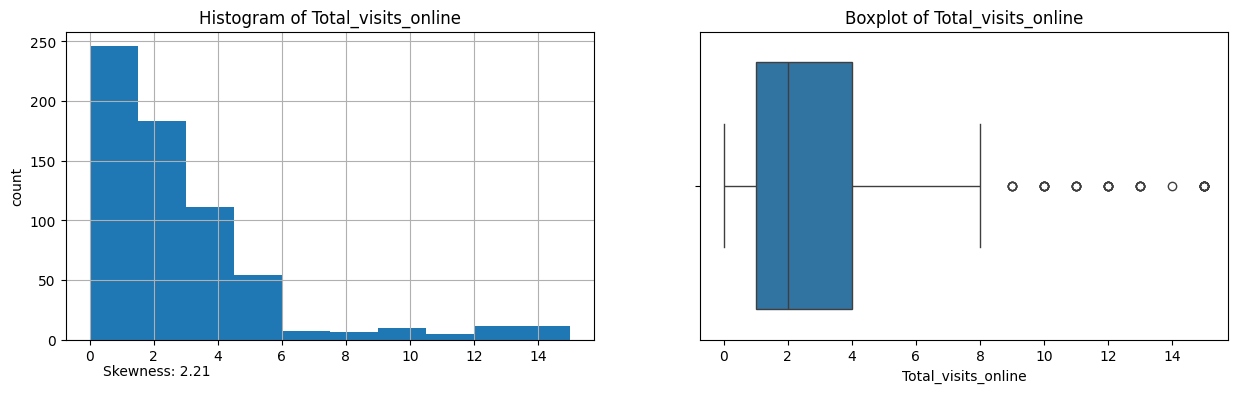

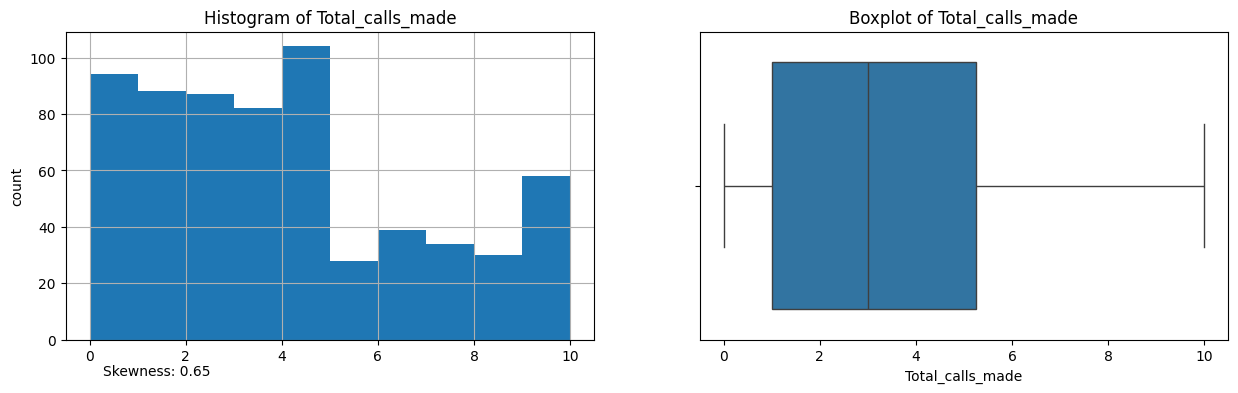

In [ ]:
# complete the BELOW code by filling the blanks, before running the cell to avoid any errors

for col in data.columns:
    print(col)

    skew_value = round(data[col].skew(), 2)
    print('Skew :', skew_value)

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)
    data[col].hist()
    # Add title to histogram
    plt.title(f'Histogram of {col}')
    plt.ylabel('count')
    # Print skewness under histogram
    plt.figtext(0.15, 0.02, f'Skewness: {skew_value}', fontsize=10)


    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[col])
    # Add title to boxplot
    plt.title(f'Boxplot of {col}')


    # To save ea side by side category sep from others save and download inside the loop as PNG with 300 dpi for high quality
    # Because they are side by side, only need name of one of them to be named (ex: just histogram / not boxplot too)
    plt.savefig(f'hist_boxplot_{col}.png', dpi=300)
    files.download(f'hist_boxplot_{col}.png')



from google.colab import files
  # Replace with your file name
files.download(f'hist_boxplot_{col}.png')


plt.show()

### **Check correlation**

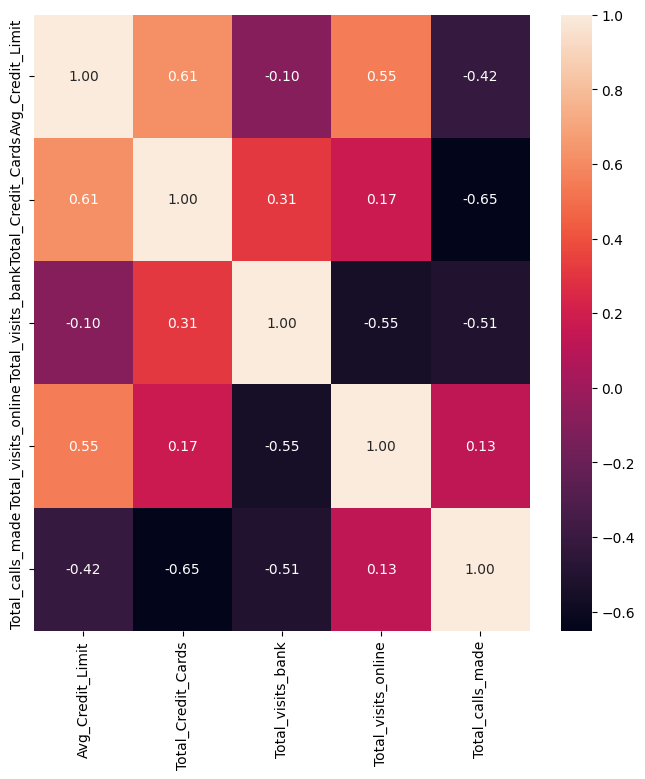

In [ ]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

### **Scale the data**

In [ ]:
scaler = StandardScaler()

# Standardize the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(data)

### **Apply PCA on scaled data**

In [ ]:
from sklearn.decomposition import PCA

n = data.shape[1]

# Create a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

# Save components to a DataFrame
data_pca = pd.DataFrame(principal_components, columns = data.columns)

In [ ]:
# Creating copy of the data to store labels from each algorithm

data_copy = data_pca.copy(deep = True)

## **K-Means**

Fit the K-means algorithm on pca components and find out the optimum number of clusters to use.

Do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

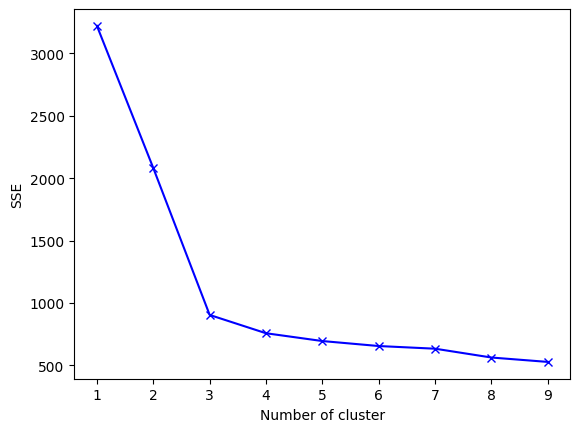

In [ ]:
# step 1
sse = {}

# step 2 - iterate for a range of Ks and fit the pca components to the algorithm.
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K

# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

In [ ]:
# Apply the K-Means algorithm
kmeans = KMeans(n_clusters=9)

 # Fit the kmeans function on the pca components
kmeans.fit(principal_components)

# Adding predicted labels to the original data and the copied data

# Save the predictions on the pca components from K-Means
data_copy['Labels'] = kmeans.labels_
data['Labels'] = kmeans.labels_

###**Look at the various features based on the labels.**

### **Creating cluster profiles using the below summary statistics and box plots for each label**

In [ ]:
# Number of observations in each cluster
data.Labels.value_counts()




,count
Labels,
1,105
5,105
7,86
8,82
3,79
4,78
0,60
6,26
2,23


In [ ]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

# Create a list of index names for all groups
index_names = [f'kmeans_group_{i} Mean' for i in range(9)] + [f'kmeans_group_{i} Median' for i in range(9)]

# Assign the new index
df_kmeans.index = index_names

df_kmeans.T
print (df_kmeans.T)

                     kmeans_group_0 Mean  kmeans_group_1 Mean  \
Avg_Credit_Limit            11200.000000         17971.428571   
Total_Credit_Cards              2.166667             5.580952   
Total_visits_bank               1.850000             2.485714   
Total_visits_online             3.333333             0.971429   
Total_calls_made                6.200000             2.076190   
GmmLabels                       1.000000             1.990476   
kmedoLabels                     0.000000             1.780952   

                     kmeans_group_2 Mean  kmeans_group_3 Mean  \
Avg_Credit_Limit           108043.478261         52822.784810   
Total_Credit_Cards              8.826087             5.810127   
Total_visits_bank               0.652174             4.506329   
Total_visits_online            10.956522             0.810127   
Total_calls_made                1.217391             2.000000   
GmmLabels                       0.000000             2.000000   
kmedoLabels             

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

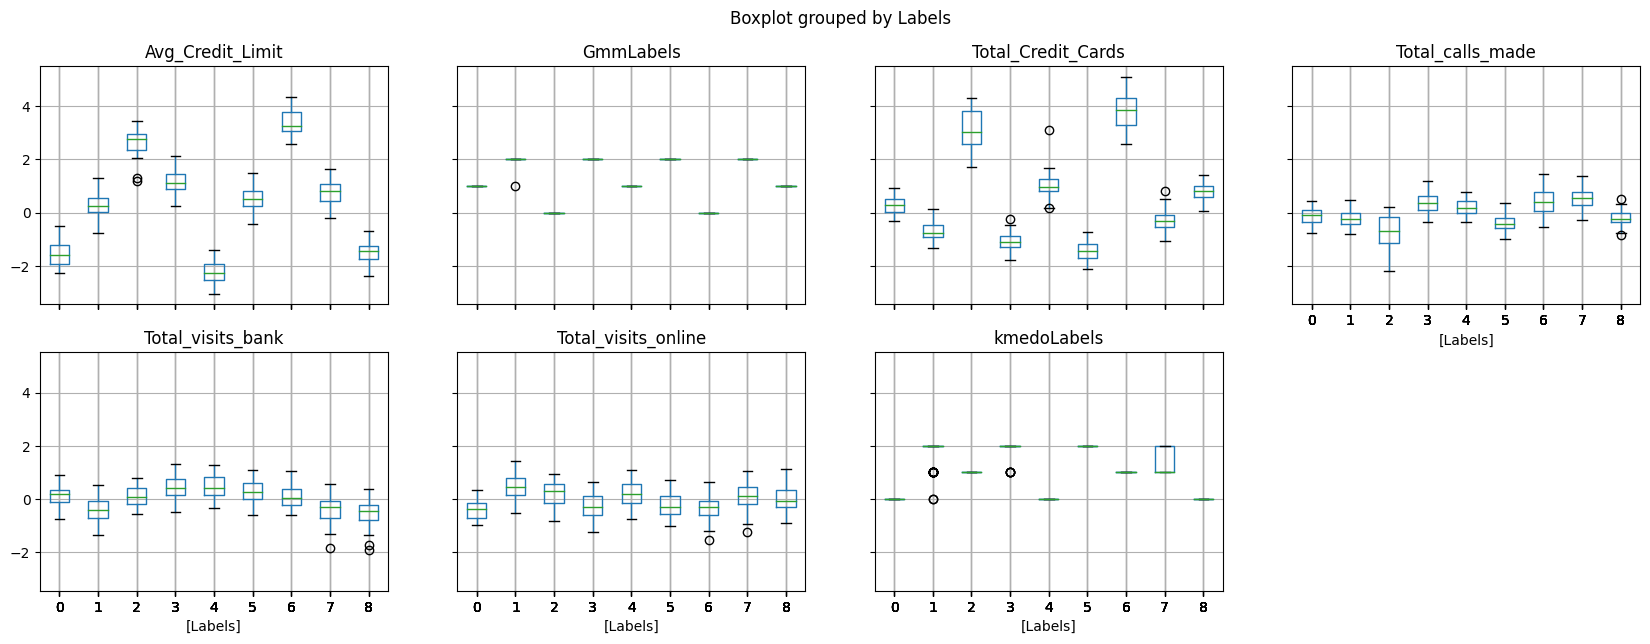

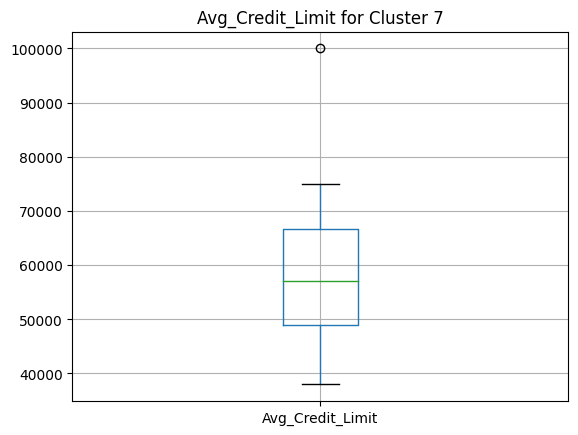

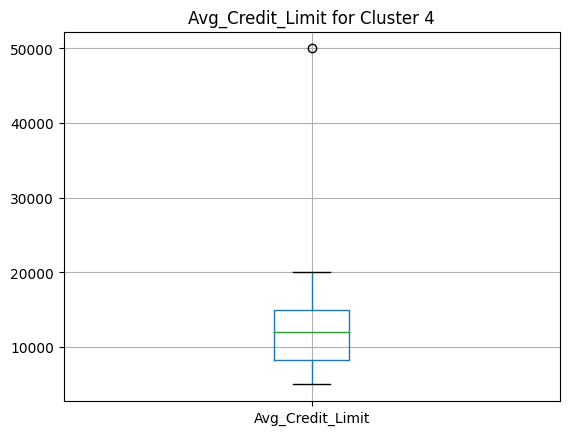

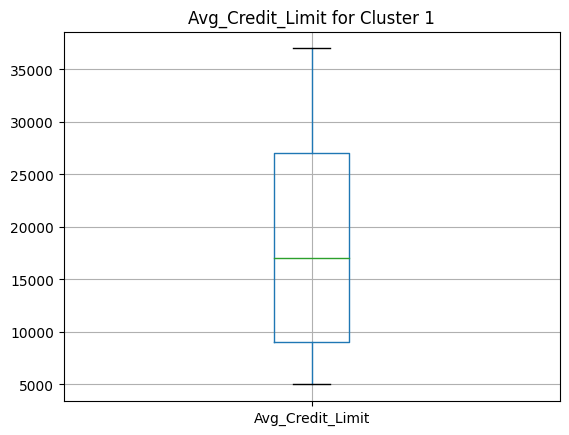

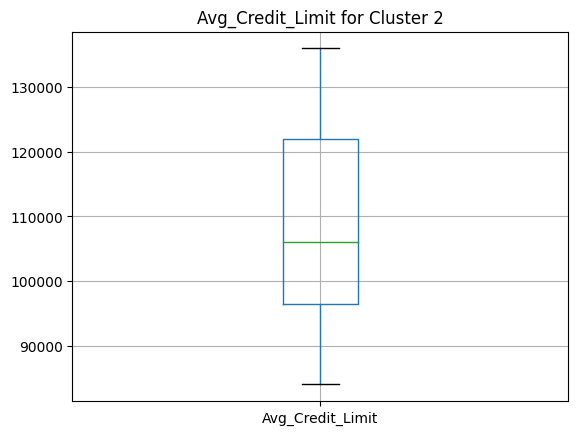

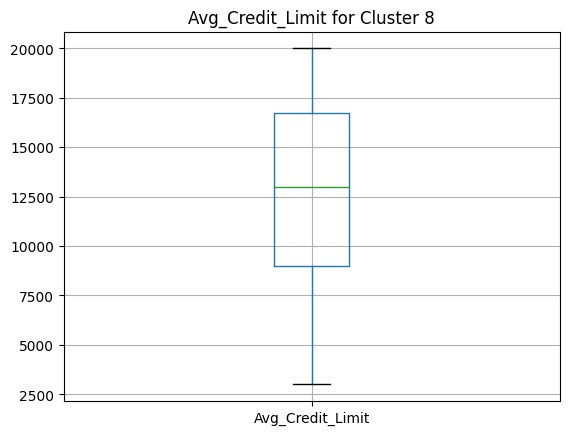

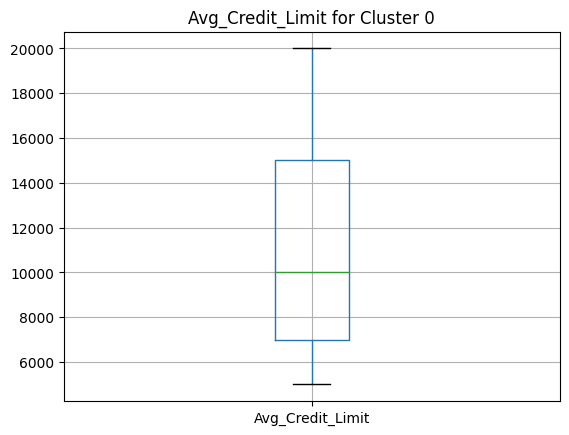

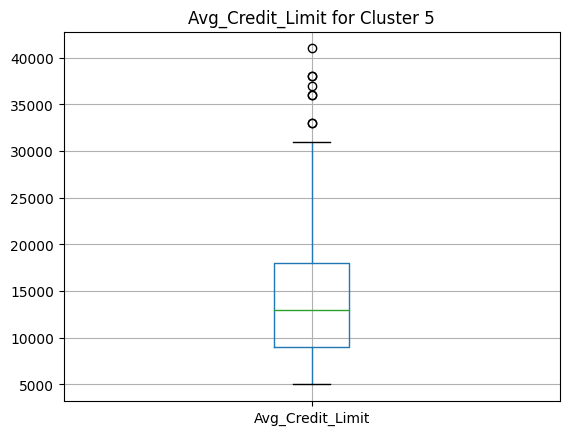

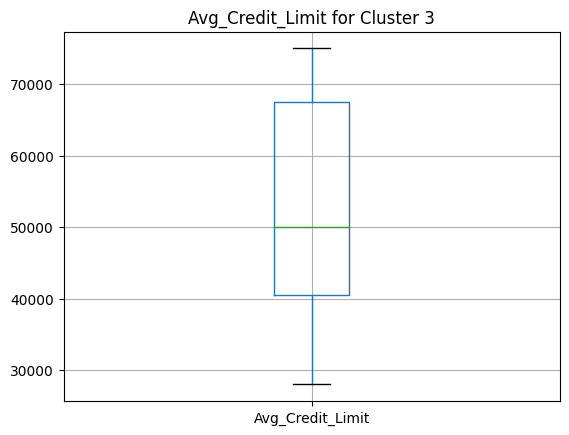

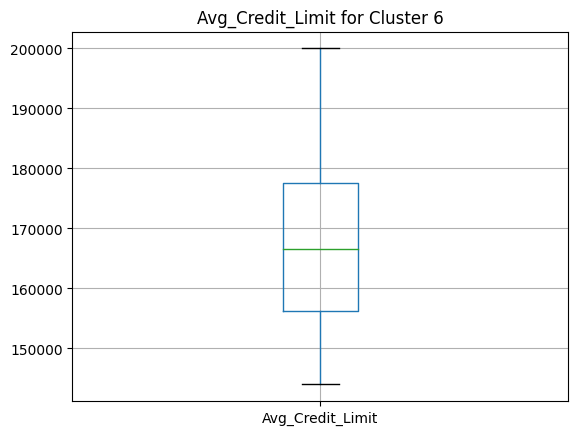

In [ ]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (2, 4), figsize = (20, 7)) # Changed the layout to (2, 4) to accommodate all 7 plots

# Assuming 'data' is your DataFrame with 'Labels' column and 'Avg_Credit_Limit'
for cluster in data['Labels'].unique():
    plt.figure()
    data[data['Labels'] == cluster].boxplot(column='Avg_Credit_Limit')
    plt.title(f'Avg_Credit_Limit for Cluster {cluster}')
    plt.suptitle('')  # Remove default title
    plt.savefig(f'cluster_{cluster}_boxplot.png',dpi=300)  # Save the figure
    files.download(f'cluster_{cluster}_boxplot.png')

from google.colab import files
  # Replace with your file name
files.download(f'cluster_{cluster}_boxplot.png')



plt.show()

**Write Cluster Profiles:_______________**

## **Gaussian Mixture Model**

Create clusters using the Gaussian Mixture Model.

In [ ]:
# Apply the Gaussian Mixture algorithm on the pca components with n_components=3 and random_state=1
gmm = GaussianMixture(n_components=3, random_state=1)


# Fit the model on the pca components
gmm.fit(data_pca)

data_copy['GmmLabels'] = gmm.predict(data_pca)

data['GmmLabels'] = gmm.predict(data_pca)

In [ ]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

,count
GmmLabels,
2,374
1,221
0,49


In [ ]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['Gmm_group_0 Mean', 'Gmm_group_1 Mean', 'Gmm_group_2 Mean', 'Gmm_group_0 Median', 'Gmm_group_1 Median', 'Gmm_group_2 Median']

df_gmm[original_features].T

,Gmm_group_0 Mean,Gmm_group_1 Mean,Gmm_group_2 Mean,Gmm_group_0 Median,Gmm_group_1 Median,Gmm_group_2 Median
Avg_Credit_Limit,140102.040816,12239.819005,33893.048128,145000.0,12000.0,31500.0
Total_Credit_Cards,8.775510,2.411765,5.508021,9.0,2.0,6.0
Total_visits_bank,0.591837,0.945701,3.489305,1.0,1.0,3.0
Total_visits_online,10.979592,3.561086,0.975936,11.0,4.0,1.0
Total_calls_made,1.102041,6.891403,1.997326,1.0,7.0,2.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

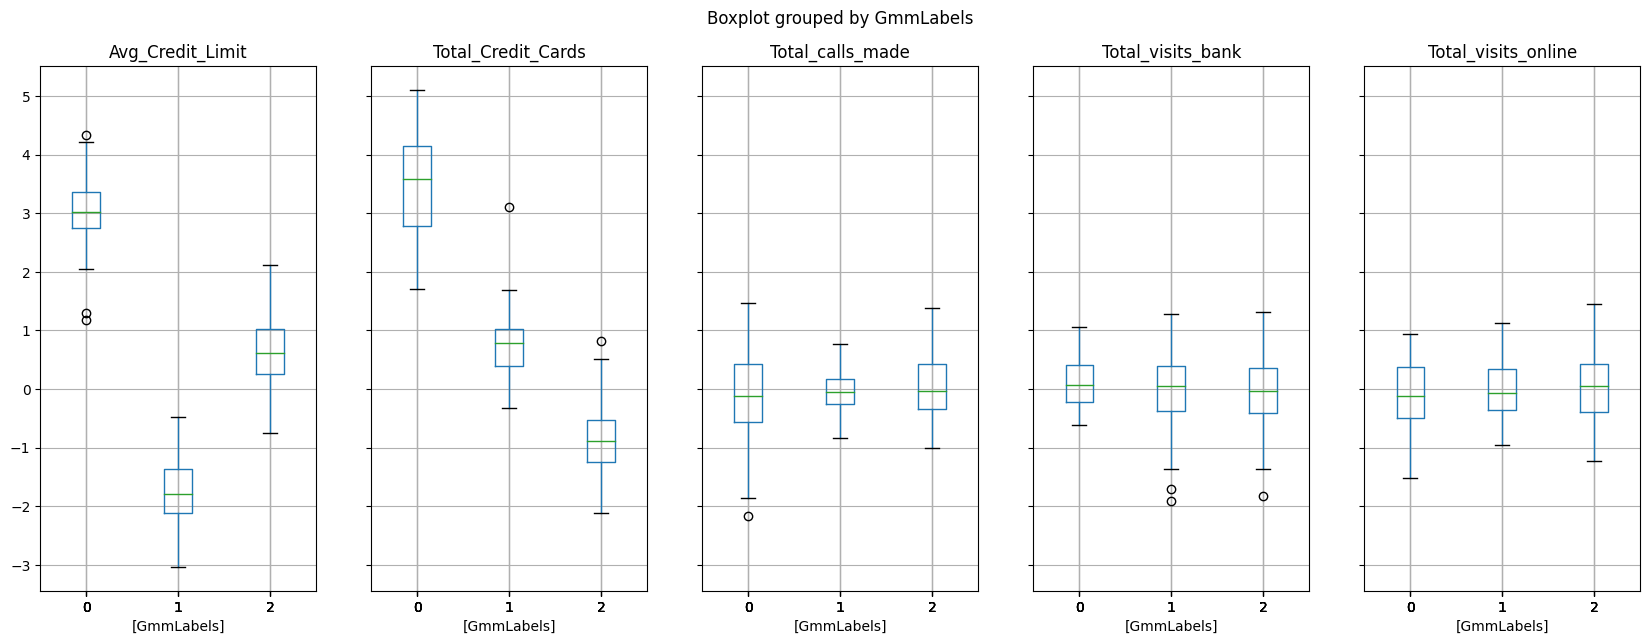

In [ ]:
# Plotting boxplots with the new GMM based labels

def create_cluster_profile(data, cluster_label, file_name):
  """
  Creates a cluster profile and saves it to a CSV file.

  Args:
      data: DataFrame containing the data.
      cluster_label: Label of the cluster.
      file_name: Name of the file to save the profile.
  """
  cluster_data = data[data['GmmLabels'] == cluster_label]
  profile = cluster_data.describe(include='all')  # Includes summary stats for all columns

  profile.to_csv("GMM Banking")


# Create and save profiles for each cluster
for cluster in data['GmmLabels'].unique():
  create_cluster_profile(data, cluster, f'cluster_{cluster}_profile.csv')



features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))
plt.savefig(f'GmmLabels_{cluster}_boxplot.png',dpi=300)  # Save the figure



from google.colab import files
  # Replace with your file name
files.download(f'GmmLabels_{cluster}_boxplot.png')




plt.show()



## **K-Medoids**

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

# Apply the K-Medoids algorithm on the pca components with n_components=3 and random_state=1
kmedo = KMedoids(n_clusters=3, random_state=1)   # Complete the code

# Fit the model on the pca components
kmedo.fit(principal_components)   # Complete the code

data_copy['kmedoLabels'] = kmedo.predict(principal_components)  # Use principal_components

data['kmedoLabels'] = kmedo.predict(principal_components)  # Use principal_components

In [ ]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

,count
kmedoLabels,
2,289
0,222
1,133


In [ ]:
# Calculate summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['kmedoids_group_0 Mean', 'kmedoids_group_1 Mean', 'kmedoids_group_2 Mean', 'kmedoids_group_0 Median', 'kmedoids_group_1 Median', 'kmedoids_group_2 Median']

df_kmedoids[original_features].T

,kmedoids_group_0 Mean,kmedoids_group_1 Mean,kmedoids_group_2 Mean,kmedoids_group_0 Median,kmedoids_group_1 Median,kmedoids_group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


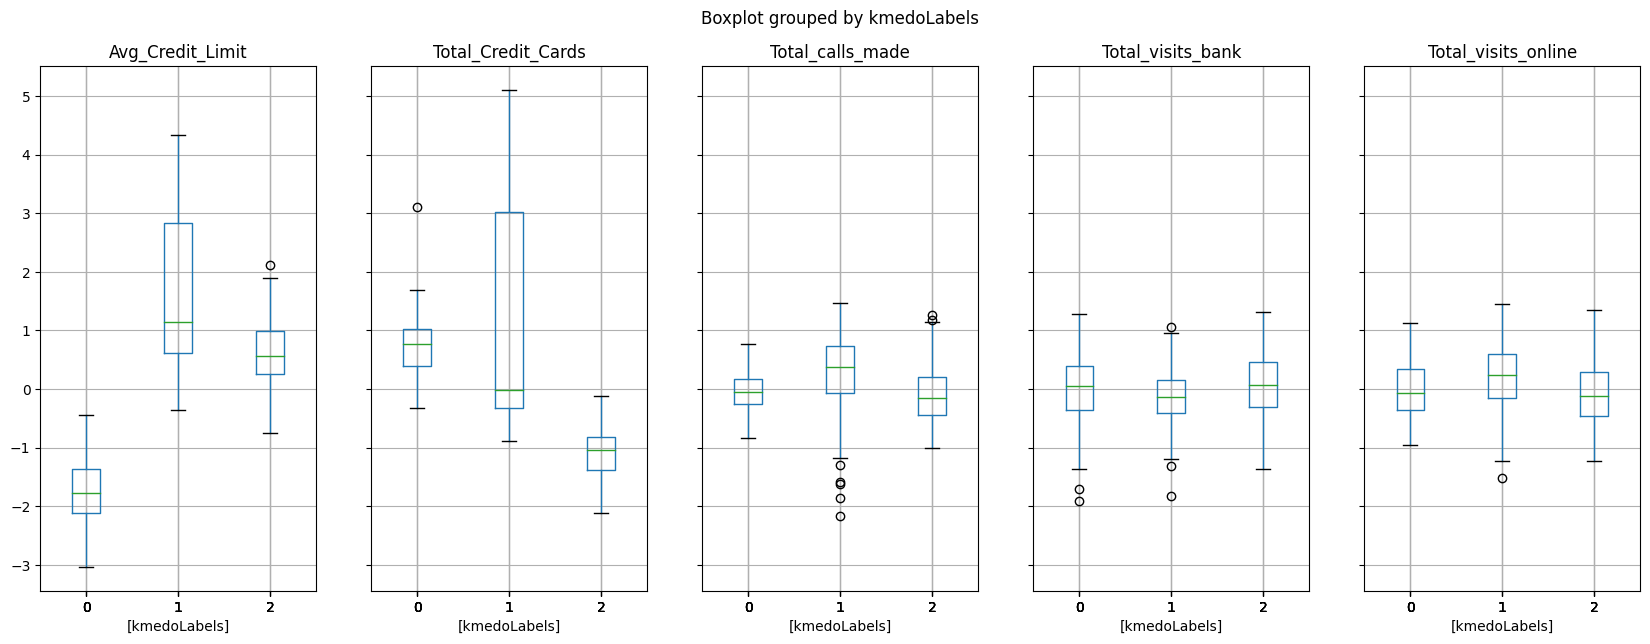

In [ ]:
# Plott boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

Compare the clusters from K-Means and K-Medoids

In [ ]:

comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

# Use fillna on the DataFrame 'comparison'
comparison.fillna(0, inplace=True)

comparison


,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
kmedoids_group_0 Mean,12216.216216,0.000000,2.423423,0.000000,0.950450,0.000000,3.554054,0.000000,6.878378,0.000000
kmedoids_group_1 Mean,85052.631579,0.000000,7.030075,0.000000,1.691729,0.000000,4.639098,0.000000,1.969925,0.000000
kmedoids_group_2 Mean,28449.826990,0.000000,5.363322,0.000000,3.830450,0.000000,0.982699,0.000000,1.851211,0.000000
kmedoids_group_0 Median,12000.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,7.000000,0.000000
kmedoids_group_1 Median,68000.000000,0.000000,7.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000
kmedoids_group_2 Median,20000.000000,0.000000,5.000000,0.000000,4.000000,0.000000,1.000000,0.000000,2.000000,0.000000
kmeans_group_0 Mean,0.000000,11200.000000,0.000000,2.166667,0.000000,1.850000,0.000000,3.333333,0.000000,6.200000
kmeans_group_1 Mean,0.000000,17971.428571,0.000000,5.580952,0.000000,2.485714,0.000000,0.971429,0.000000,2.076190
kmeans_group_2 Mean,0.000000,108043.478261,0.000000,8.826087,0.000000,0.652174,0.000000,10.956522,0.000000,1.217391
kmeans_group_3 Mean,0.000000,52822.784810,0.000000,5.810127,0.000000,4.506329,0.000000,0.810127,0.000000,2.000000


## **Conclusion and Business Recommendations**

The greatest variance in categories are within the number of customers who go online and the credit limit among the customers. The least variance is noted in the ares of bank visits and amount of credit cards.

To close the gap between these two groups and also accomplish the goal of the Marketing and Operations team, as well as progress forward with All Life’s initiative for the next financial year, I suggest the following strategies:


• *Problem* - The customers have a poor perception of the bank’s support
services.

 •*Goal* - To upgrade the service delivery model, ensuring that customers' queries are resolved faster.

• *Data based solution* - Develop a guaranteed 1 business day turn around for support cases submitted to the bank via the online application.

--------

• *Problem* - The need to improve market penetration.

• *Goal* - Target new customers.

• *Data based solution* - Market a Secure Credit Card offering to customers with
a lower credit limit. Run a secondary campaign for a bonus cash savings card for every friend they refer into All Life.